<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
local_csv = '../data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [3]:
# A:
df = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [4]:
# A:
df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [5]:
df.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [6]:
df.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [7]:
df.shape

(90, 28)

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [8]:
# each value in the column 'Rank' indicates the Class of Rank for each team
df.Rank.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

In [9]:
# below is how you would call the specified freq of rank
df.Rank.value_counts()[3]

31

In [10]:
# A:
# there are three classes 3, 2, 1
# freq 3 = 31
# freq 2 = 30
# freq 1 = 29

In [11]:
# set the 'Rank' column as the target variable 
y = df['Rank']

### 4. What is the baseline accuracy?

In [12]:
# A:
# the baseline accuracy can be measured by finding the mode of the class rank values. 
# The most common value's frequency divided by the total number of class ranks will result in the baseline accuracy rate

baseline = df.Rank.value_counts()[3]/len(df)
print(baseline)

# the baseline accuracy would be 34% accuracy using the highest frequency class


0.34444444444444444


### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [13]:
df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


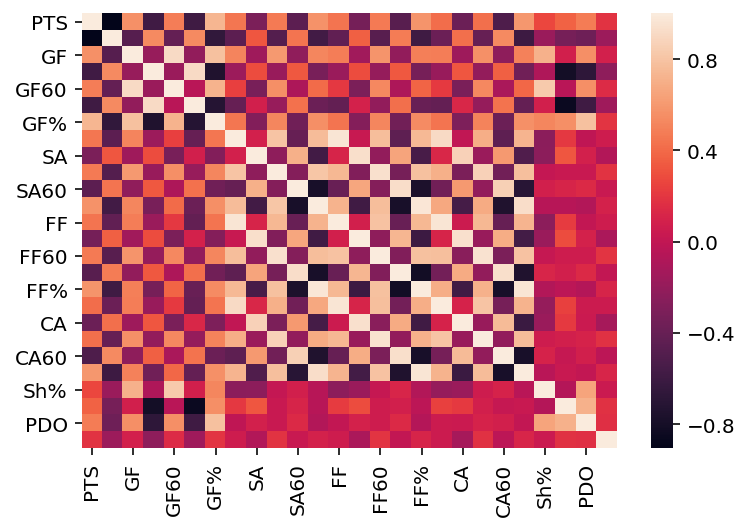

In [14]:
df.corr()
sns.heatmap(df.corr());

In [15]:
# A:
# using the following varibales {PTS, GF, GA, Sh%} 
# set them equal to the 'featured variables' that will be used as predictors of y

feature_cols = ['PTS', 'GF', "GA", "Sh%"]
X = df[feature_cols]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [16]:
# A:

# import KNN model from sci kit learn 
from sklearn.neighbors import KNeighborsClassifier as knc

# import train test split model 
from sklearn.model_selection import train_test_split as tts

# import metrics to use later for checking score/accuracy of model
from sklearn import metrics

In [17]:


X_train, X_test, y_train, y_test = tts(X, y, random_state=2, test_size=.2)


# set the number of k neighbors to 1
knn = knc(n_neighbors=1)

# run and fit the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [18]:
# A:
# populate/evaluate y_hat values  
y_hat = knn.predict(X_test)

# test score of predicted values of y - compared to test values of y
print((metrics.accuracy_score(y_test, y_hat)))


0.8888888888888888


the model results at an accuracy of 88% predicting y based on X which is better than the baseline accuracy rate
I believe it is legitatmate based on the way I have set up the model and as long as the defined features do not pose any simultanous causalality and are in fact indepedant predictors of Y


### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [19]:
# A:

# create a train test split model where the test test and training data is split 50%
X_train, X_test, y_train, y_test = tts(X, y, test_size =.5, random_state=2)
knn = knc(n_neighbors=1)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_hat)))


0.8222222222222222


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [20]:
X_train.shape
# the training data set has 45 observations

(45, 4)

In [21]:
# A:

# set the number of k values to the number of observations in the training data set
knn = knc(n_neighbors=45)
knn.fit(X_train, y_train)


y_hat = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_hat))

0.2222222222222222


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [22]:
# A:

# define empty array
scores = []

# itterate over the length of training data
for k in range(1, len(X_train)):
    knn = knc(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = float(sum(pred == y_test))/len(y_test)
    scores.append([k, score])
    
    

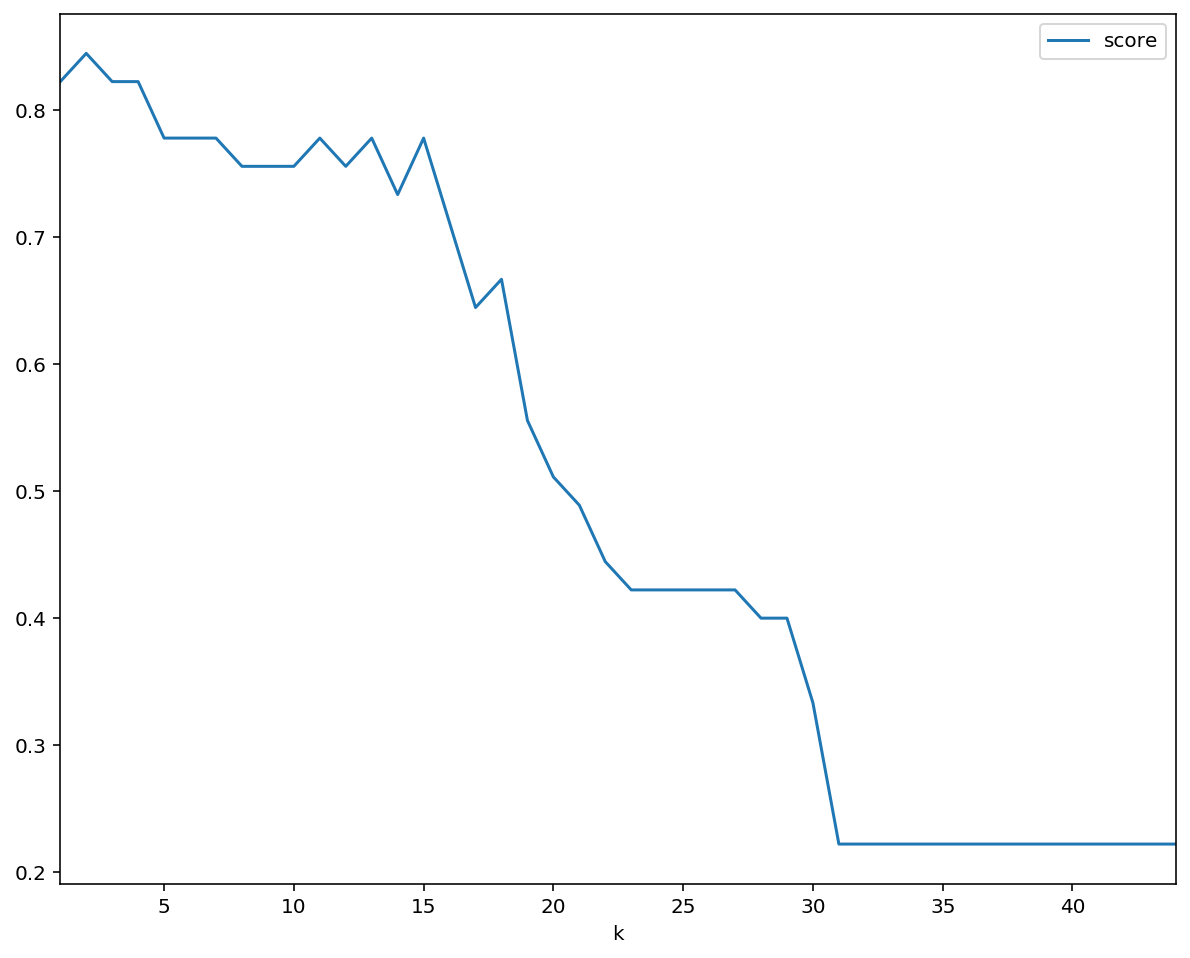

In [23]:
data = pd.DataFrame(scores, columns=['k', 'score'])
data.plot.line(x='k', y='score', figsize=(10,8));

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [24]:
# A:

# from sklearn.model_selection import cross_val_score



# cv_scores = []
# best_svr = SVR(kernel='rbf')
# cv = KFold(n_splits=10, random_state=42, shuffle=False)
# for train_index, test_index in cv.split(X):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

#     X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#     best_svr.fit(X_train, y_train)
#     scores.append(best_svr.score(X_test, y_test))



### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [25]:
# A:

# import standard scaler from sci kit learn
from sklearn.preprocessing import StandardScaler as SS
scaler = SS()

# convert training and testing data set to standaradized values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



scaler_scores = []

for k in range(1, len(X_train)):
    knn = knc(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_hat)
    testing_error = 1-testing_accuracy
    
    scaler_scores.append([testing_error, k])
    
    
data_scaler = pd.DataFrame(scaler_scores, columns=['testing_error', 'k'])
data_scaler.head()


,testing_error,k
0,0.222222,1
1,0.244444,2
2,0.200000,3
3,0.222222,4
4,0.244444,5


Text(0, 0.5, 'Error')

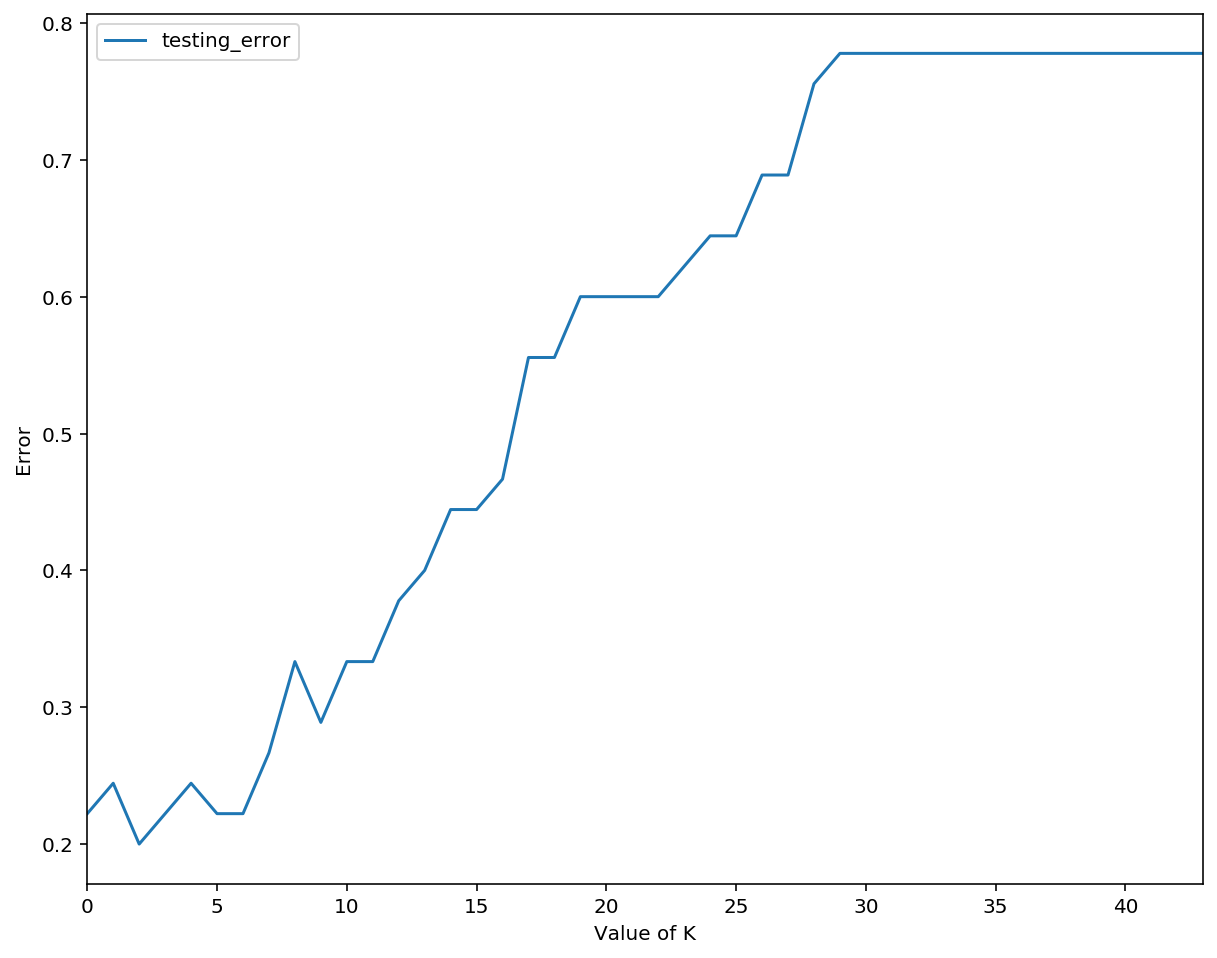

In [26]:
data_scaler.plot(y='testing_error', figsize=(10,8));
plt.xlabel('Value of K')
plt.ylabel('Error')